# Program 1 FEATURE GENERATION

##### PURPOSE:
This program converts the dates into integer features for the embedded variables.  It removes outliers and
scales the daily sales to adjust for differences in the partner's regional markets.

This is a demonstration program and is not production grade.

##### INPUT: 
Accounting data, training levels, class qualifications, customer experience responses, web activity and estimates of partner capability by management.  A Demand Index, an index of national market activity, and Price Index, an index of moving closing prices have been derived elsewhere.

##### OUTPUT: 
A feature set compatible with a tensorflow neural network predictive algorithm. The feature set is stored in the persistent file SF_data as SFFeatures.feather

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os as os
import datetime
from datetime import date, timedelta
#utility to store minmax scaler fits for each store
from sklearn.externals.joblib import dump, load
from sklearn.preprocessing import MinMaxScaler

Feather is a recently updated binary storage method still experiencing random error messages.  Update pandas to latest version and use    'conda install -c conda-forge feather-format'     for reliable operation.

In [3]:
def read_data():   
    df = pd.read_pickle('Part_Qtr_Rev_Data.pkl',compression=None)
    df.sort_values(by=['ID','Date'],axis=0,inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

In [4]:
df = read_data()

Using pandas datetime methods to convert date to integer features to be used in embedding

In [5]:
df.columns

Index(['ID', 'Class', 'Partner_Type', 'Customer_Type', 'Customer_Size',
       'Territory', 'Credit_Rating', 'Overall_Satisfaction', 'Value_Potential',
       'Expected_Relationship_Duration', 'Profit_Potential', 'Product_Quality',
       'Product_Importance', 'Product_Breadth', 'Product_Competitiveness',
       'Product_Training', 'Customer_Referral', 'Profit_Expectation',
       'Effective_Communications', 'Price_Point', 'Margin',
       'Brand_Requirement', 'Training_Effectiveness', 'Customer_Recognition',
       'Problem_Solving', 'Sales', 'Engr', 'Training', 'Support', 'Operations',
       'Expert', 'Bids', 'Quotes', 'Registrations', 'Inquiries', 'Sessions',
       'Acct_Mgr', 'Support_Mgr', 'Team_Ability', 'Team_Contribution',
       'Operations_Ability', 'Acct_Team_Satisfaction', 'Team_Solutions',
       'Usefulness', 'Effectiveness', 'Response', 'Error_Free', 'Ease_of_Use',
       'Pricing', 'Delivery_Response', 'Demand_Index', 'Price_Index', 'Rev',
       'Date'],
      dtype=

In [6]:
df.shape

(8000, 54)

In [6]:
def add_date_features(df):
#    df['WEEKDAY'] = df.DATE.dt.dayofweek
#   df['HOLIDAY'] = [d in holidays.US(years=[2016,2017,2018]) for d in df.DATE]
    df['YEAR'] = df.Date.dt.year
#    df['DAYOFYR'] = df.DATE.dt.dayofyear
#    df['WEEKOFYR'] = df.DATE.dt.week
    df['MONOFYEAR'] = df.Date.dt.month
#    df['DAY'] = df.DATE.dt.day    
    return df

Run add_date_features and reset_index to maintain index order if distrupted.  Convention is all caps for engineered columns.

In [21]:
df = add_date_features(df)
df.sort_values(by=['ID', 'Date'], inplace=True)
df.reset_index(drop=True,inplace=True)

In [22]:
df.columns

Index(['ID', 'Class', 'Partner_Type', 'Customer_Type', 'Customer_Size',
       'Territory', 'Credit_Rating', 'Overall_Satisfaction', 'Value_Potential',
       'Expected_Relationship_Duration', 'Profit_Potential', 'Product_Quality',
       'Product_Importance', 'Product_Breadth', 'Product_Competitiveness',
       'Product_Training', 'Customer_Referral', 'Profit_Expectation',
       'Effective_Communications', 'Price_Point', 'Margin',
       'Brand_Requirement', 'Training_Effectiveness', 'Customer_Recognition',
       'Problem_Solving', 'Sales', 'Engr', 'Training', 'Support', 'Operations',
       'Expert', 'Bids', 'Quotes', 'Registrations', 'Inquiries', 'Sessions',
       'Acct_Mgr', 'Support_Mgr', 'Team_Ability', 'Team_Contribution',
       'Operations_Ability', 'Acct_Team_Satisfaction', 'Team_Solutions',
       'Usefulness', 'Effectiveness', 'Response', 'Error_Free', 'Ease_of_Use',
       'Pricing', 'Delivery_Response', 'Demand_Index', 'Price_Index', 'Rev',
       'Date', 'YEAR', 'MONO

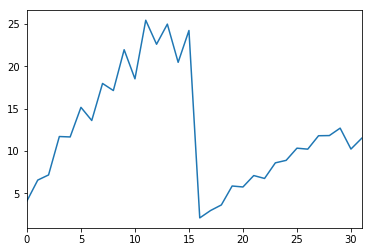

In [23]:
df.Rev[:32].plot()

No geographical, econometric or competitive information available to scale different 
partner economic potential.
In order to adjust accounting data for these unknown features the sales are scaled to 
make the partners comparable.

In [24]:
def scale_sales(df):
    REV = []
    for s in list(df.ID.unique()):
        y = []
        ds = df[df.ID == s]
        scaler = MinMaxScaler()
        X=np.array(ds.Rev).reshape(-1,1)
        dump(scaler.fit(X),os.getcwd() + '/scaler/' + str(s) +'_scaler')
        y = scaler.transform(X)
        rev = [item for sublist in y for item in sublist]
        REV = REV + rev
    return REV
        

In [25]:
df['REV'] = scale_sales(df)
df.reset_index(drop=True,inplace=True)

Plot of store variation.

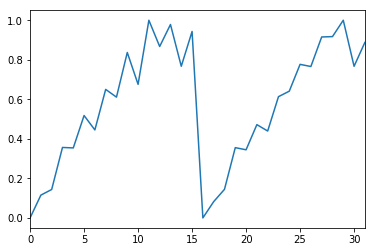

In [26]:
df.REV[:32].plot()

Plot of scaled store sales.

No marketing or operations information is available to explain abnormal daily variations in sales levels.
The statistics of the daily sales shows wide variations in quartile performance.  
An important enhancement to this program is adding the latent features regarding sales promotions, competitive actions,
competing store closures, etc to account for this variation.  
An output of this program is the dates and extremity of the latent features.

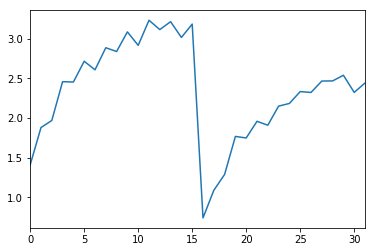

In [34]:
np.log(df.Rev)[:32].plot()

In [31]:
df.REV.describe()

count    8000.000000
mean        0.582989
std         0.300608
min         0.000000
25%         0.370290
50%         0.652506
75%         0.832429
max         1.000000
Name: REV, dtype: float64

In [32]:
df.Rev.describe()

count    8000.000000
mean       20.711978
std        14.115113
min         1.731328
25%         9.612693
50%        17.432011
75%        29.158963
max        72.354947
Name: Rev, dtype: float64

In [33]:
np.log(df.Rev).describe()

count    8000.000000
mean        2.771287
std         0.766887
min         0.548889
25%         2.263084
50%         2.858308
75%         3.372762
max         4.281584
Name: Rev, dtype: float64

In [30]:
df.sort_values(by=['ID','Date'],inplace=True)
df.to_pickle('Partner_Features.pkl')

##### CLOSE FILE
This file should be closed using the File 'Close and Halt' menu dropdown selection.  